In [20]:
import pandas as pd

In [21]:
# Load the CSV file
file_path = 'resultados_random_search_2.csv'
model_results = pd.read_csv(file_path, delimiter=';')


# Display the first few rows of the dataset to understand its structure
model_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__optimizer,param_model__neurons,param_model__loss,param_model__kernel_initializer,param_model__dropout_rate,param_model__activation,param_epochs,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,51.354405,0.394846,0.507710,0.023207,adam,16,mse,random_uniform,0.3,tanh,100,32,"{'model__optimizer': 'adam', 'model__neurons':...",-53752.899894,-54155.665153,-54461.663006,-54123.409351,290.248876,69
1,48.936490,0.529956,0.782246,0.108104,sgd,32,mse,normal,0.2,tanh,100,32,"{'model__optimizer': 'sgd', 'model__neurons': ...",-8990.495091,-9119.764648,-8920.806111,-9010.355283,82.429547,20
2,50.416996,1.739463,0.873141,0.022215,sgd,16,mse,random_uniform,0.3,relu,100,32,"{'model__optimizer': 'sgd', 'model__neurons': ...",NaN,NaN,NaN,NaN,NaN,92
3,53.266802,0.449933,0.810524,0.077659,sgd,32,mse,random_uniform,0.3,tanh,100,32,"{'model__optimizer': 'sgd', 'model__neurons': ...",-9207.981921,-9038.308748,-8839.356010,-9028.548893,150.649055,21
4,57.993877,0.370277,0.686436,0.066405,adam,32,mse,normal,0.2,tanh,100,32,"{'model__optimizer': 'adam', 'model__neurons':...",-53527.653678,-53932.043296,-54236.820599,-53898.839191,290.466653,59


In [22]:
# Ordenar os modelos pelo desempenho (mean_test_score)
sorted_results = model_results.sort_values(by="mean_test_score", ascending=False)

# Selecionar os 5 melhores e os 5 piores modelos
top_5_models = sorted_results.head(5)
bottom_5_models = sorted_results.tail(5)

# Concatenar os 5 melhores e 5 piores modelos em um único DataFrame
top_bottom_models = pd.concat([top_5_models, bottom_5_models])

# Exibir os resultados
print("Top 5 Modelos:")
print(top_5_models)
print("\nBottom 5 Modelos:")
print(bottom_5_models)


Top 5 Modelos:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
69      58.800727      3.760629         0.726869        0.124591   
29      58.083236      1.079062         0.752038        0.120545   
79      61.775163      3.428373         0.784405        0.078675   
57      57.864932      4.154131         0.784884        0.036620   
40      31.728183      0.985934         0.696309        0.055884   

   param_model__optimizer  param_model__neurons param_model__loss  \
69                   adam                    32               mse   
29                   adam                    32               mse   
79                   adam                    32               mae   
57                   adam                    16               mae   
40                   adam                    32               mse   

   param_model__kernel_initializer  param_model__dropout_rate  \
69                  random_uniform                        0.3   
29                          nor

In [23]:
# Salvar os 5 melhores e 5 piores modelos em um arquivo CSV
output_file_path = 'top_bottom_models.csv'
top_bottom_models.to_csv(output_file_path, index=False, sep=";")

output_file_path


'top_bottom_models.csv'

In [24]:
# Selecionar apenas as colunas solicitadas
selected_columns = [
    "mean_test_score",
    "param_model__optimizer",
    "param_model__neurons",
    "param_model__loss",
    "param_model__kernel_initializer",
    "param_model__dropout_rate",
    "param_model__activation",
    "param_epochs"
]

filtered_top_bottom_models = top_bottom_models[selected_columns]

# Salvar o novo DataFrame filtrado em um CSV
filtered_output_file_path = 'filtered_top_bottom_models.csv'
filtered_top_bottom_models.to_csv(filtered_output_file_path, index=False, sep=";")

filtered_output_file_path


'filtered_top_bottom_models.csv'

Matriz de Correlação:
                           param_model__neurons  param_model__dropout_rate  \
param_model__neurons                   1.000000                   0.054196   
param_model__dropout_rate              0.054196                   1.000000   
param_epochs                           0.051217                   0.058140   
mean_test_score                        0.051568                   0.092001   

                           param_epochs  mean_test_score  
param_model__neurons           0.051217         0.051568  
param_model__dropout_rate      0.058140         0.092001  
param_epochs                   1.000000         0.027436  
mean_test_score                0.027436         1.000000  


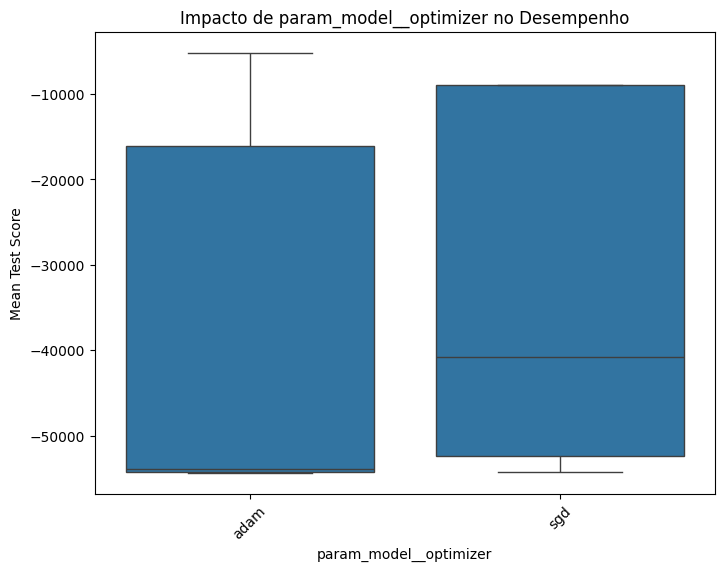

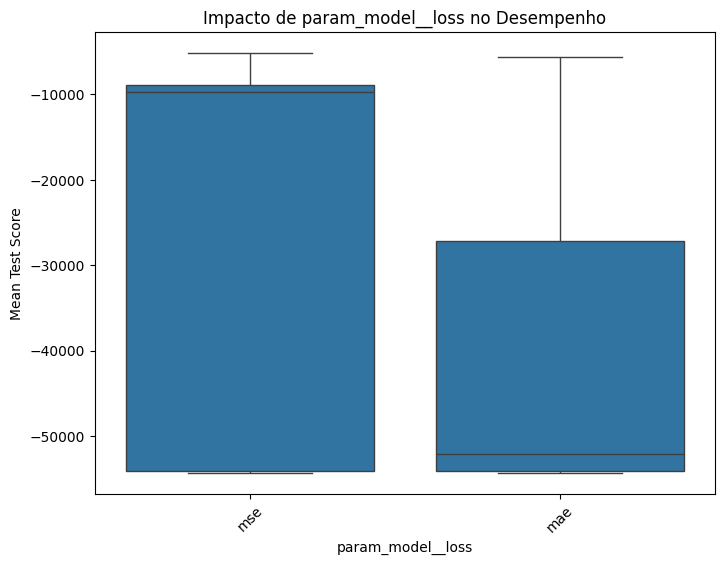

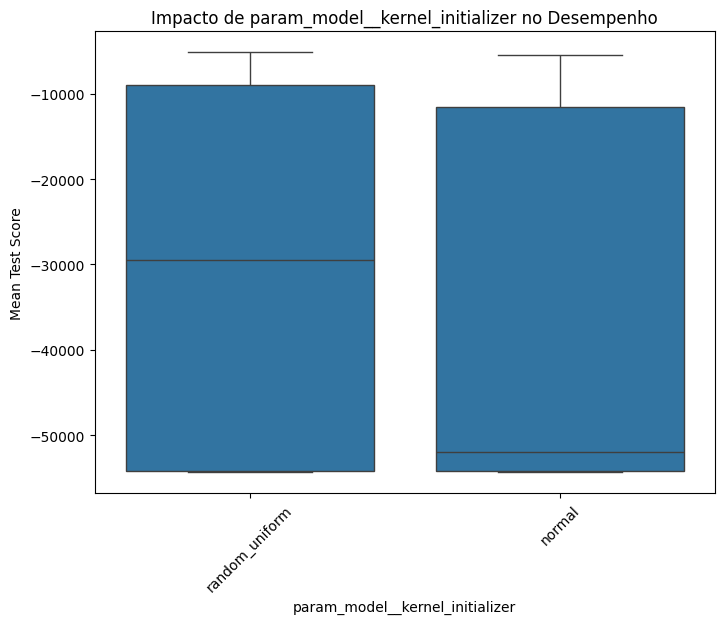

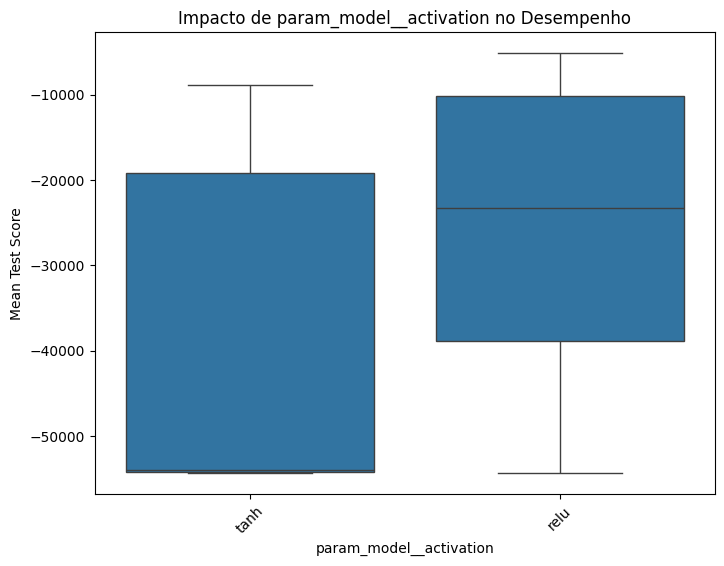

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar dados relevantes
analysis_data = model_results[
    ["mean_test_score", "param_model__optimizer", "param_model__neurons",
     "param_model__loss", "param_model__kernel_initializer", "param_model__dropout_rate",
     "param_model__activation", "param_epochs"]
].dropna()

# Verificar a correlação entre os parâmetros numéricos e o desempenho
numerical_params = ["param_model__neurons", "param_model__dropout_rate", "param_epochs"]
correlations = analysis_data[numerical_params + ["mean_test_score"]].corr()

# Exibir a matriz de correlação no console
print("Matriz de Correlação:")
print(correlations)

# Criar boxplots para parâmetros categóricos
categorical_params = ["param_model__optimizer", "param_model__loss",
                      "param_model__kernel_initializer", "param_model__activation"]

for param in categorical_params:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=analysis_data, x=param, y="mean_test_score")
    plt.title(f"Impacto de {param} no Desempenho")
    plt.xticks(rotation=45)
    plt.xlabel(param)
    plt.ylabel("Mean Test Score")
    plt.show()
